In [1]:
from planning_through_contact.experiments.planar_pushing.old.planar_pushing_gcs import plan_planar_pushing, DynamicsConfig, StartEndSpecs
from planning_through_contact.geometry.collision_geometry.t_pusher_2d import TPusher2d
from planning_through_contact.geometry.collision_geometry.box_2d import Box2d
from planning_through_contact.geometry.rigid_body import RigidBody

In [2]:
import matplotlib.pyplot as plt
from typing import List
import numpy.typing as npt
import numpy as np

def plot_polytope(vertices: List[npt.NDArray[np.float32]]):
    vertices = [v.flatten().tolist() for v in vertices]

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create a Polygon from the vertices
    polygon = plt.Polygon(vertices, closed=True, fill=None, edgecolor='b')

    # Add the polygon to the axis
    ax.add_patch(polygon)

    # Set the axis limits based on your data
    min_x = min(vertex[0] for vertex in vertices)
    max_x = max(vertex[0] for vertex in vertices)
    min_y = min(vertex[1] for vertex in vertices)
    max_y = max(vertex[1] for vertex in vertices)
    ax.set_xlim(min_x - 0.1, max_x + 0.1)  # Add a little margin for better visualization
    ax.set_ylim(min_y - 0.1, max_y + 0.1)

    # Show the plot
    plt.axis('equal')  # Make sure the aspect ratio is equal
    plt.show()

import pydot
from IPython.display import SVG, display

def show_gcs_diagram(gcs):
    graphviz = gcs.GetGraphvizString()
    data = pydot.graph_from_dot_data(graphviz)[0]
    display(SVG(data.create_svg()))


### Investigate tightness for different geometries

Let us just fix a set of dynamics parameters:

In [4]:
mass = 0.1
f_max = 0.5 * 9.81 * mass
dynamics_config = DynamicsConfig(
    friction_coeff_table_slider=0.5,
    friction_coeff_slider_pusher=0.5,
    f_max=f_max,
    tau_max=f_max * 0.2,
)

Lets also fix a fixed start and end pose for the slider:

In [5]:
th_initial = 0
th_target = 0.5
pos_initial = np.array([[0.2, 0.1]])
pos_target = np.array([[-0.2, 0.2]])
start_end_specs = StartEndSpecs(th_initial, th_target, pos_initial, pos_target)

## Boxes of varying shapes

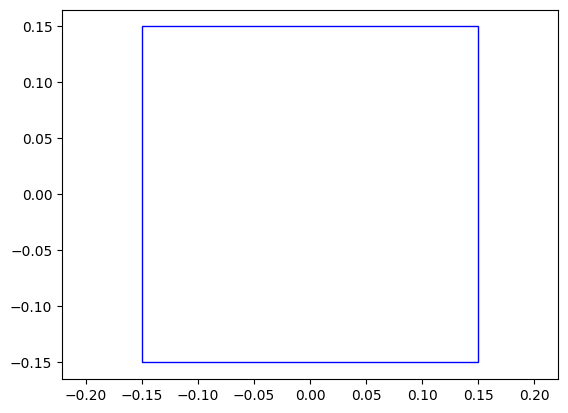

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_2_at_1, from_1_to_2_at_2, face_2
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


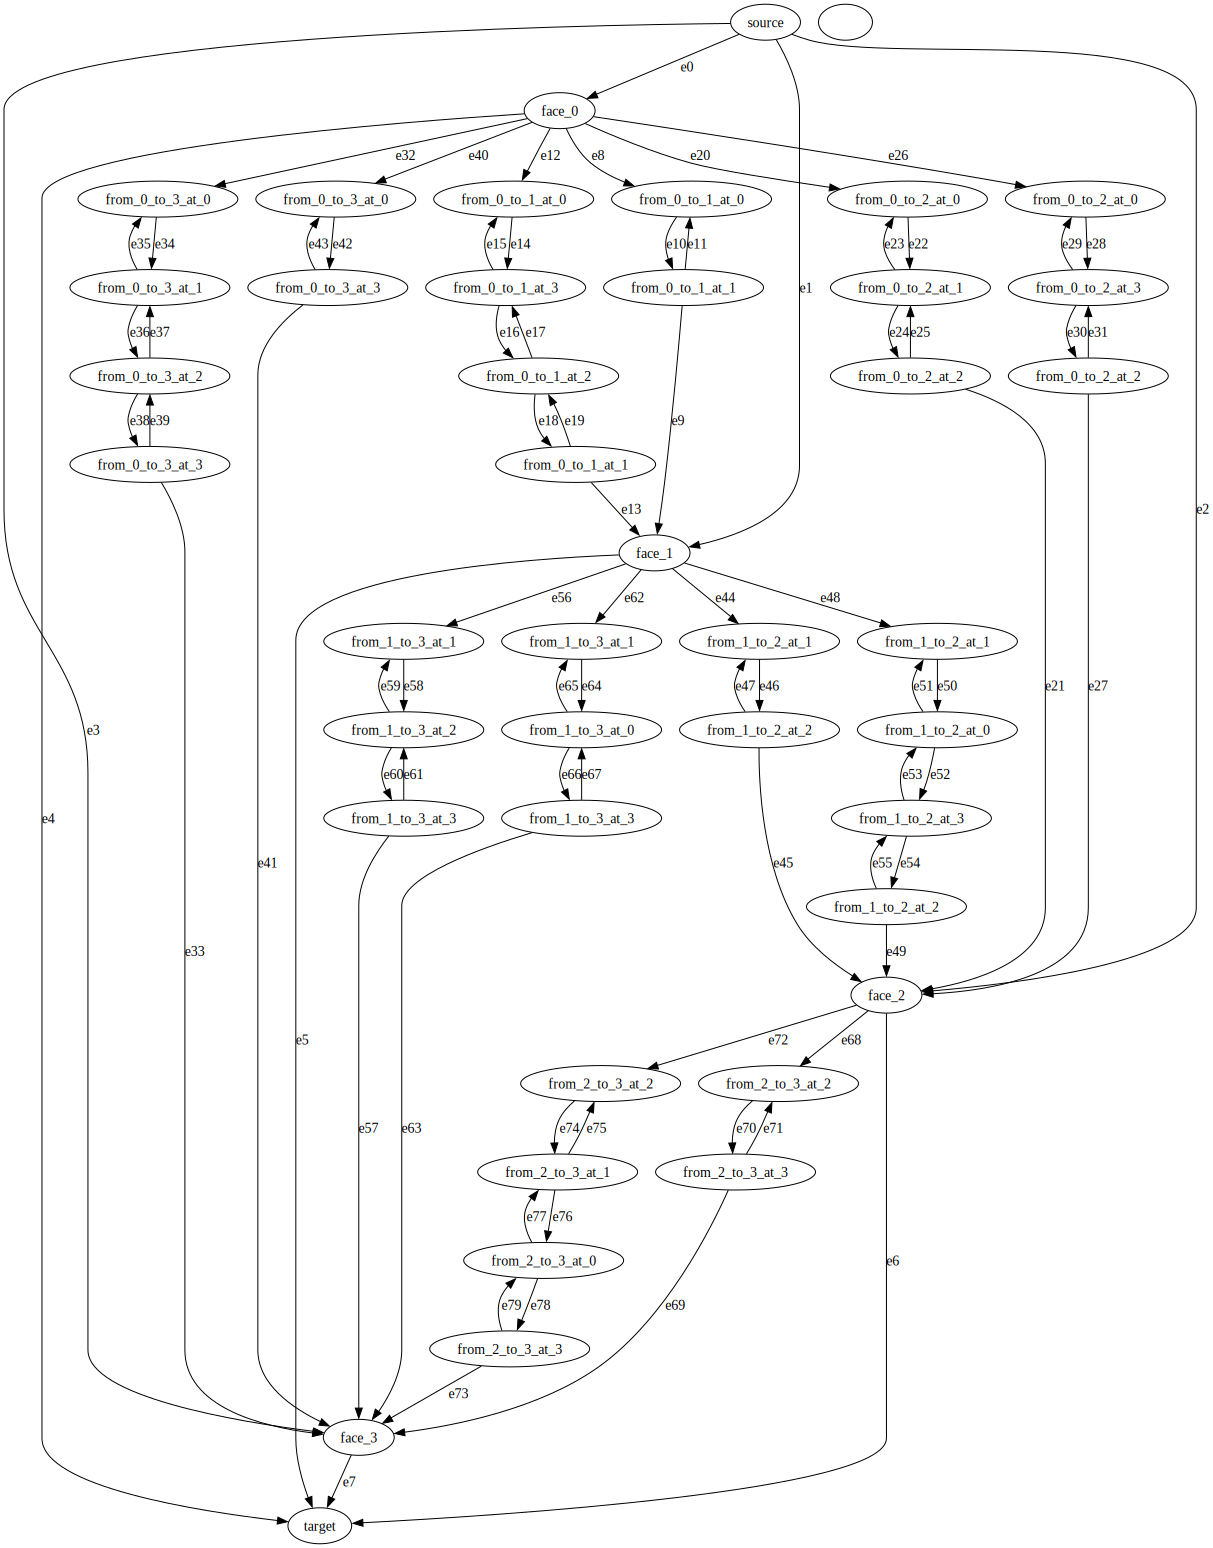

In [7]:
slider = RigidBody("box", Box2d(width=0.3, height=0.3), mass)
plot_polytope(slider.geometry.vertices)
show_gcs_diagram(plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
))

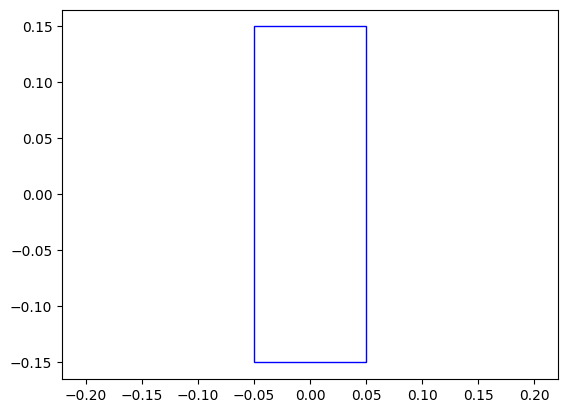

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_3_at_1, from_1_to_3_at_0, from_1_to_3_at_3, face_3
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


In [8]:
slider = RigidBody("box", Box2d(width=0.1, height=0.3), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

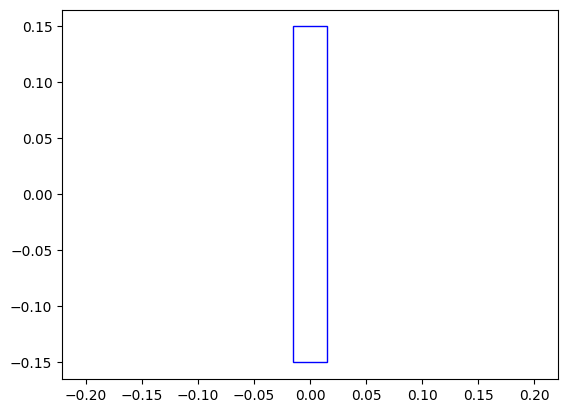

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_3_at_1, from_1_to_3_at_0, from_1_to_3_at_3, face_3
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


In [8]:
slider = RigidBody("box", Box2d(width=0.03, height=0.3), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

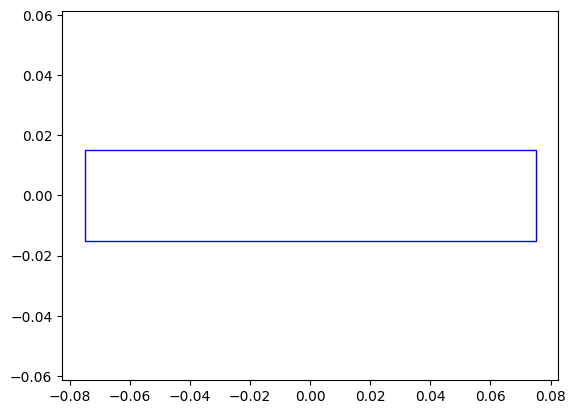

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_2_at_1, from_1_to_2_at_2, face_2
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


In [9]:
slider = RigidBody("box", Box2d(width=0.15, height=0.03), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

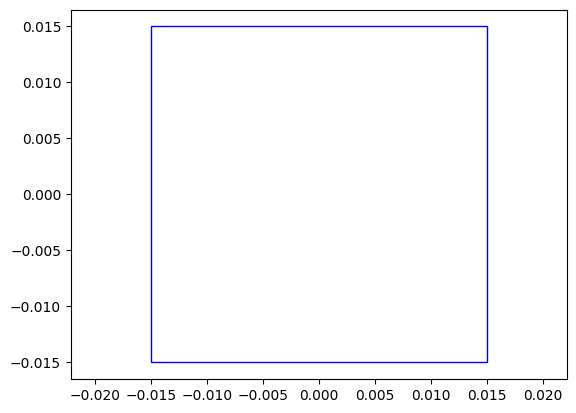

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_2_at_1, from_1_to_2_at_2, face_2, from_2_to_3_at_2, from_2_to_3_at_3, face_3
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


In [10]:
slider = RigidBody("box", Box2d(width=0.03, height=0.03), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

## Tee's of varying shapes

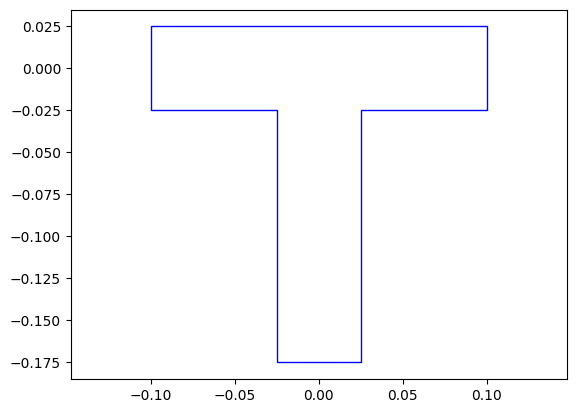

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_3_at_1, from_1_to_3_at_2, face_3, from_3_to_4_at_2, from_3_to_4_at_3, face_4, from_4_to_5_at_3, from_4_to_5_at_4, face_5
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


In [11]:
slider = RigidBody("t_pusher", TPusher2d(), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

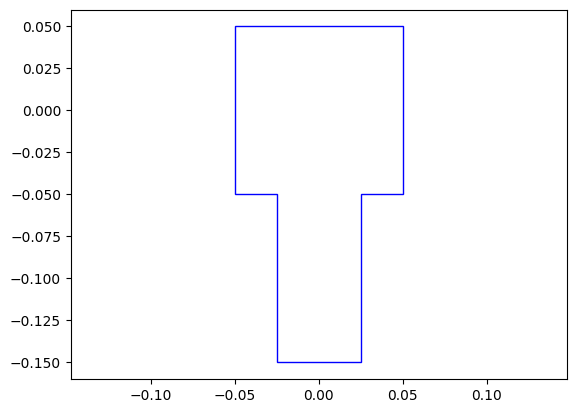

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_2_at_1, from_1_to_2_at_2, face_2, from_2_to_4_at_2, from_2_to_4_at_3, face_4, from_4_to_5_at_3, from_4_to_5_at_4, face_5
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


In [12]:
slider = RigidBody("t_pusher", TPusher2d(box_1=Box2d(width=0.1, height=0.1), box_2=Box2d(width=0.05, height=0.1)), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

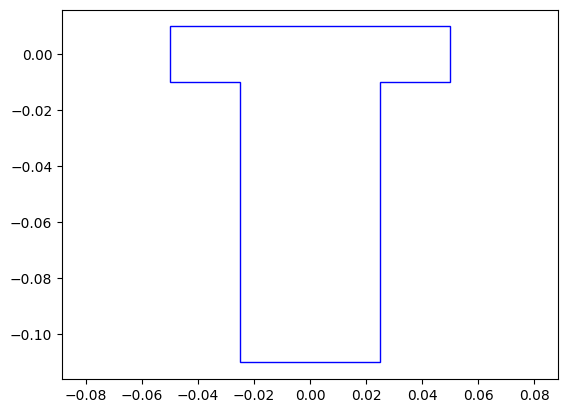

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_2_at_1, from_1_to_2_at_2, face_2, from_2_to_3_at_2, from_2_to_3_at_1, from_2_to_3_at_0, from_2_to_3_at_5, from_2_to_3_at_4, from_2_to_3_at_3, from_2_to_3_at_2, face_3, from_3_to_4_at_2, from_3_to_4_at_3, face_4, from_4_to_5_at_3, from_4_to_5_at_4, face_5
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


In [13]:

slider = RigidBody("t_pusher", TPusher2d(box_1=Box2d(width=0.1, height=0.02), box_2=Box2d(width=0.05, height=0.1)), mass)
plot_polytope(slider.geometry.vertices)
plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

#### What about for different paths?


In [19]:
bodies = [
    RigidBody("box", Box2d(width=0.15, height=0.15), mass),
    RigidBody("t_pusher", TPusher2d(box_1=Box2d(width=0.1, height=0.02), box_2=Box2d(width=0.05, height=0.1)), mass),
]
plans = [
    StartEndSpecs(
        th_initial=0, th_target=0.3, pos_initial=np.array([0,0]), pos_target=np.array([0.2,0.2])
        ),
    StartEndSpecs(
        th_initial=0, th_target=-0.3, pos_initial=np.array([-0.2,0.1]), pos_target=np.array([0.2,-0.2])
        ),
]

In [20]:
slider = RigidBody("t_pusher", TPusher2d(box_1=Box2d(width=0.1, height=0.02), box_2=Box2d(width=0.05, height=0.1)), mass)
for body in bodies:
    for plan in plans:
        plan_planar_pushing(
            plan,
            body,
            dynamics_config,
            max_rounded_paths=1,
        )

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_1, from_1_to_2_at_1, from_1_to_2_at_2, face_2, from_2_to_3_at_2, from_2_to_3_at_3, face_3
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_3_at_0, from_0_to_3_at_3, face_3
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_2_at_1, from_1_to_2_at_2, face_2, from_2_to_4_at_2, from_2_to_4_at_3, face_4, from_4_to_5_at_3, from_4_to_5_at_4, face_5
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_3_at_1, from_1_to_3_at_2, face_3, from_3_to_4_at_2, from_3_to_4_at_3, face_4, from_4_to_5_at_3, from_4_to_5_at_4, face_5
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.99, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


AssertionError: 

Okay, so the last combination is not feasible. Investigate it:

In [38]:
def plot_polytopes(vertices_list: List[List[npt.NDArray[np.float32]]]):
    colors = ['r', 'g', 'b']
    vertices_list = [[v.flatten().tolist() for v in vertices] for vertices in vertices_list]

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create a Polygon from the vertices
    for color, vertices in zip(colors, vertices_list):
        polygon = plt.Polygon(vertices, closed=True, fill=None, edgecolor=color)

        # Add the polygon to the axis
        ax.add_patch(polygon)

    # Set the axis limits based on your data
    min_x = min(vertex[0] for vertex in vertices for vertices in vertices_list)
    max_x = max(vertex[0] for vertex in vertices for vertices in vertices_list)
    min_y = min(vertex[1] for vertex in vertices for vertices in vertices_list)
    max_y = max(vertex[1] for vertex in vertices for vertices in vertices_list)

    ax.set_xlim(min_x - 0.1, max_x + 0.1)  # Add a little margin for better visualization
    ax.set_ylim(min_y - 0.1, max_y + 0.1)

    # Show the plot
    plt.axis('equal')  # Make sure the aspect ratio is equal
    plt.show()

def make_R(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])

def rotate_vertices(vertices, R):
    return [R.dot(v) for v in vertices]

def translate_vertices(vertices, trans):
    return [v + trans for v in vertices]

def transform_vertices(vertices, R, trans):
    return translate_vertices(rotate_vertices(vertices, R), trans)

def plot_start_and_end(plan: StartEndSpecs, slider):
    R_start = make_R(plan.th_initial)
    R_end = make_R(plan.th_target)

    trans_start = plan.pos_initial.reshape((-1,1))
    trans_end = plan.pos_target.reshape((-1,1))

    v_start = transform_vertices(slider.geometry.vertices, R_start, trans_start)
    v_end = transform_vertices(slider.geometry.vertices, R_end, trans_end)

    plot_polytopes([v_start, v_end])
    

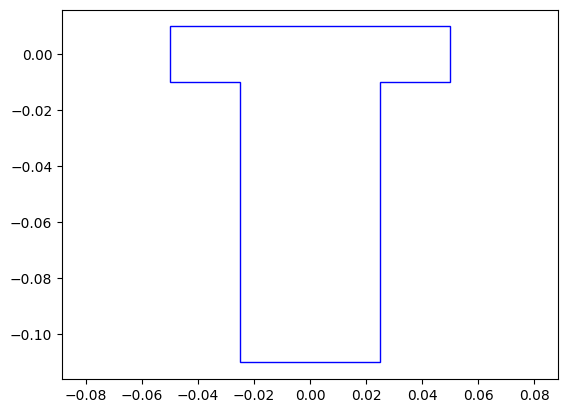

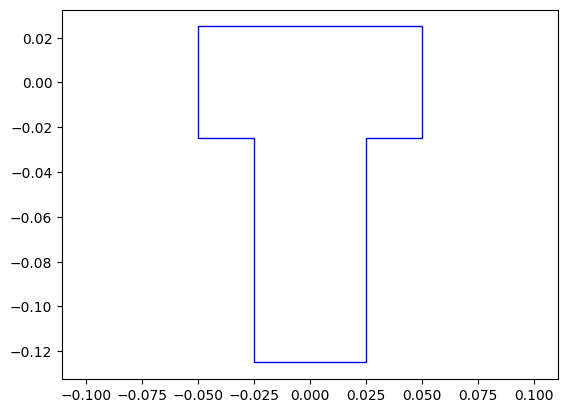

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_3_at_1, from_1_to_3_at_2, face_3, from_3_to_4_at_2, from_3_to_4_at_3, face_4, from_4_to_5_at_3, from_4_to_5_at_4, face_5
Determinants:
1.00, 1.00, 0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.97, 0.95, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.93, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.94, 0.95, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.99, 1.00, 1.00


AssertionError: 

In [24]:
# Not feasible for this:
slider = RigidBody("t_pusher", TPusher2d(box_1=Box2d(width=0.1, height=0.02), box_2=Box2d(width=0.05, height=0.1)), mass)
plot_polytope(slider.geometry.vertices)

# what if we change the object geometry a bit?
slider = RigidBody("t_pusher", TPusher2d(box_1=Box2d(width=0.1, height=0.05), box_2=Box2d(width=0.05, height=0.1)), mass)
plot_polytope(slider.geometry.vertices)

plan = StartEndSpecs(th_initial=0, th_target=-0.3, pos_initial=np.array([-0.2,0.1]), pos_target=np.array([0.2,-0.2]))

plan_planar_pushing(
    plan,
    slider,
    dynamics_config,
    max_rounded_paths=1,
)

Hmm, more infeasible when we change the shape. Visualize the plan:

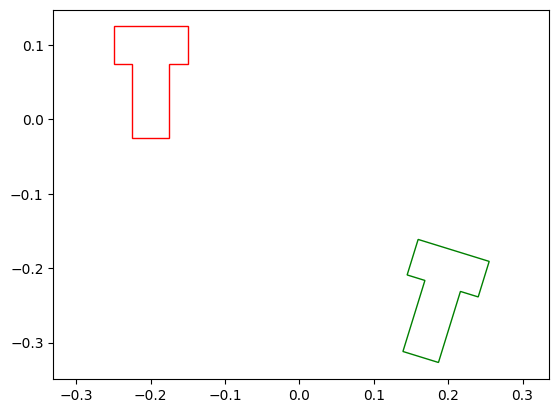

In [39]:
plot_start_and_end(plan, slider)

What if we disregard the dynamics completely?

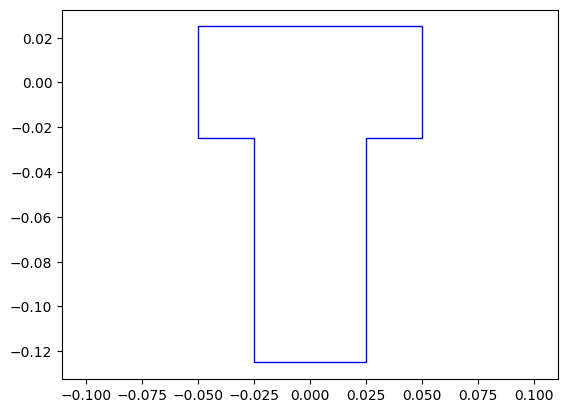

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_3_at_1, from_1_to_3_at_2, face_3, from_3_to_4_at_2, from_3_to_4_at_3, face_4, from_4_to_5_at_3, from_4_to_5_at_4, face_5
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


In [6]:
slider = RigidBody("t_pusher", TPusher2d(box_1=Box2d(width=0.1, height=0.05), box_2=Box2d(width=0.05, height=0.1)), mass)
plot_polytope(slider.geometry.vertices)

plan = StartEndSpecs(th_initial=0, th_target=-0.3, pos_initial=np.array([-0.2,0.1]), pos_target=np.array([0.2,-0.2]))

plan_planar_pushing(
    plan,
    slider,
    dynamics_config,
    max_rounded_paths=1,
    use_dynamics=False,
)

Ok, so it is feasible when there are no dynamics.
Could this be because of translational dynamics?
    - Yes, because they do constrain the velocity direction based on the friction cone.
    - Otherwise (as long as there is no upper bound on the force) they do not add any constraints.
Most likely because of angular dynamics.

In [7]:
plan_planar_pushing(
    plan,
    slider,
    dynamics_config,
    max_rounded_paths=1,
    use_angular_dynamics=False,
)

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_3_at_1, from_1_to_3_at_2, face_3, from_3_to_4_at_2, from_3_to_4_at_3, face_4, from_4_to_5_at_3, from_4_to_5_at_4, face_5
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


OK! So it is the angular dynamics that makes the plan infeasible. Great! We can use motion cones instead then.

### What about different starting rotations?
(this could be because of no cycles in graph)

In [21]:
bodies = [
    RigidBody("box", Box2d(width=0.15, height=0.15), mass),
    RigidBody("t_pusher", TPusher2d(box_1=Box2d(width=0.1, height=0.02), box_2=Box2d(width=0.05, height=0.1)), mass),
]
plans = [
    StartEndSpecs(
        th_initial=2.1, th_target=2.4, pos_initial=np.array([0,0]), pos_target=np.array([0.2,0.2])
        ),
    StartEndSpecs(
        th_initial=2.1, th_target=1.7, pos_initial=np.array([-0.2,0.1]), pos_target=np.array([0.2,-0.2])
        ),
]

slider = RigidBody("t_pusher", TPusher2d(box_1=Box2d(width=0.1, height=0.02), box_2=Box2d(width=0.05, height=0.1)), mass)
for body in bodies:
    for plan in plans:
        plan_planar_pushing(
            plan,
            body,
            dynamics_config,
            max_rounded_paths=1,
        )

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_2_at_1, from_1_to_2_at_2, face_2
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_1, from_1_to_2_at_1, from_1_to_2_at_2, face_2, from_2_to_3_at_2, from_2_to_3_at_3, face_3
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_0, from_0_to_1_at_0, from_0_to_1_at_1, face_1, from_1_to_3_at_1, from_1_to_3_at_2, face_3, from_3_to_4_at_2, from_3_to_4_at_3, face_4, from_4_to_5_at_3, from_4_to_5_at_4, face_5
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_1, from_1_to_2_at_1, from_1_to_2_at_2, face_2, from_2_to_4_at_2, from_2_to_4_at_3, face_4, from_4_to_5_at_3, from_4_to_5_at_4, face_5
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


## Lets try some with cycles

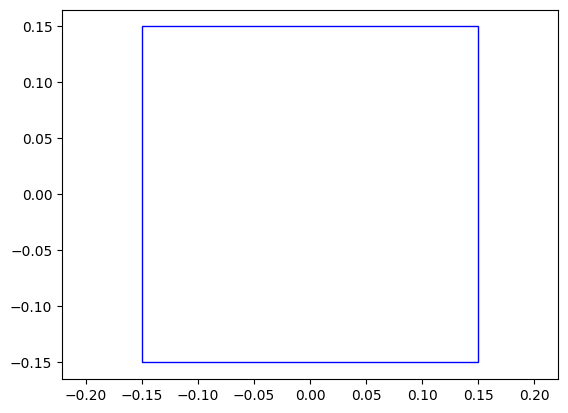

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 1 rounding trials.


Success!
Path:
face_2, from_2_to_3_at_2, from_2_to_3_at_3, face_3, from_0_to_3_at_3, from_0_to_3_at_0, face_0
Determinants:
1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00


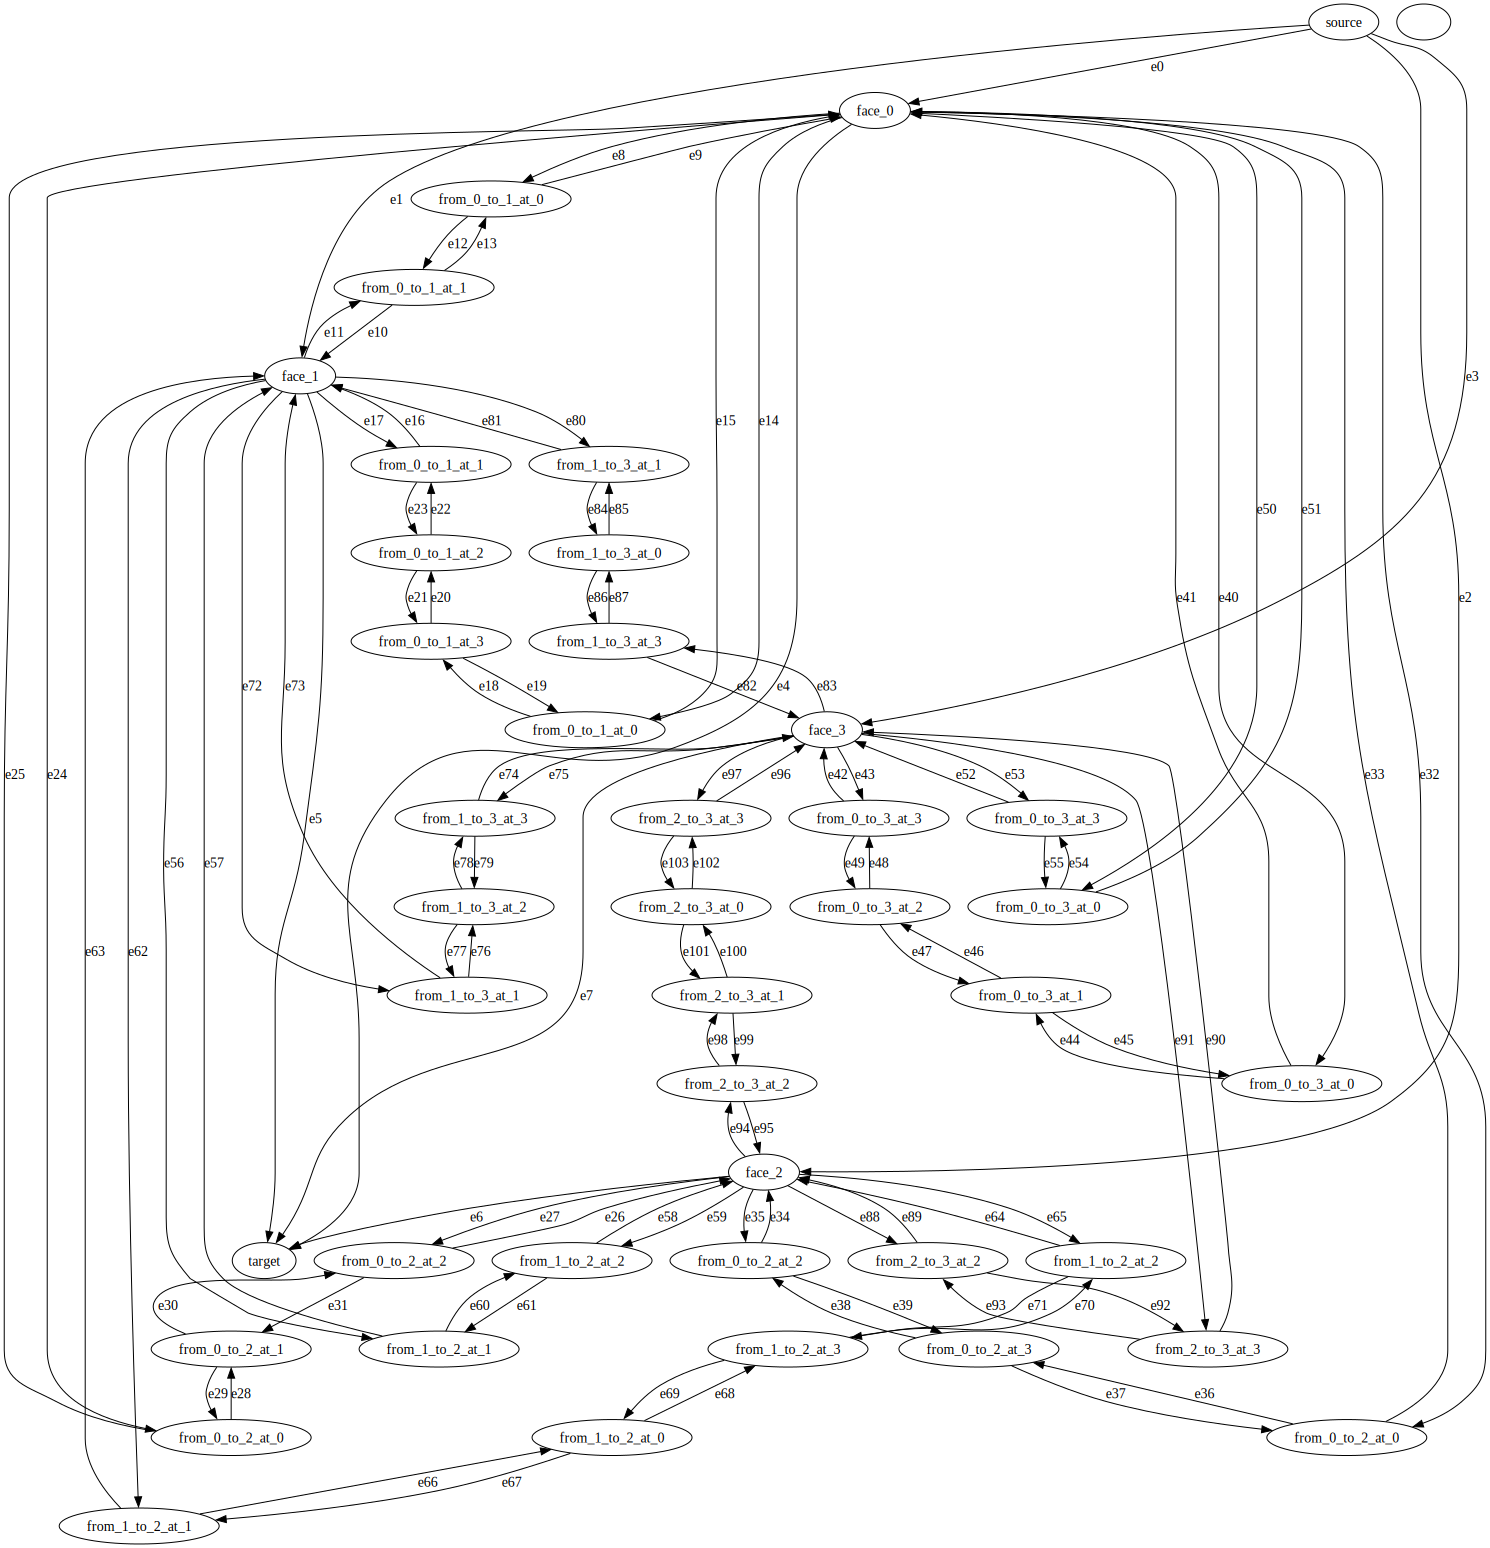

In [14]:
slider = RigidBody("box", Box2d(width=0.3, height=0.3), mass)
plot_polytope(slider.geometry.vertices)
show_gcs_diagram(plan_planar_pushing(
    start_end_specs,
    slider,
    dynamics_config,
    max_rounded_paths=1,
    no_cycles=False,
))